In [167]:
import re, json, requests
import pandas as pd
import math

In [101]:
url = 'https://raw.githubusercontent.com/rohitashwachaks/Social-Media-Influencer-analysis/main/Twitter-Influencers/tweet.json'

In [102]:
resp = requests.get(url)
resp_parsed = re.sub(r'^jsonp\d+\(|\)\s+$', '', resp.text)
data = json.loads(resp_parsed)

In [103]:
data = pd.DataFrame(data)

In [123]:
data.columns

Index(['created_at', 'id', 'id_str', 'text', 'display_text_range', 'source',
       'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'quote_count', 'reply_count',
       'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted',
       'filter_level', 'lang', 'timestamp_ms', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status',
       'quoted_status_permalink'],
      dtype='object')

In [212]:
data.in_reply_to_screen_name[3]

In [202]:
type(data.retweeted_status[1]) == dict

True

In [169]:
data.retweeted_status[1].get('user').get('screen_name')

'espn'

In [183]:
data.entities[3].get('user_mentions')[0].get('screen_name')

'richsignorelli'

In [148]:
data.user[1].get('screen_name')

'KabalNeil'

In [203]:
user_provide = []
user_receive = []
attention_type = []

In [204]:
for i in range(len(data)):
    
   #reply
    if data.in_reply_to_screen_name[i] != None:
        user_provide.append(data.user[i].get('screen_name'))
        user_receive.append(data.in_reply_to_screen_name[i])
        attention_type.append('reply')
    
    #retweet
    if type(data.retweeted_status[i]) == dict:
        user_provide.append(data.user[i].get('screen_name'))
        user_receive.append(data.retweeted_status[i].get('user').get('screen_name'))
        attention_type.append('RT')
    
    #mention
    if len(data.entities[i].get('user_mentions'))!=0:
        for j in range(len(data.entities[i].get('user_mentions'))):
            user_provide.append(data.user[i].get('screen_name'))
            user_receive.append(data.entities[i].get('user_mentions')[j].get('screen_name'))
            attention_type.append('mention')
        
        

In [207]:
network_data = pd.DataFrame({'user_provide':user_provide,'user_receive':user_receive,'attention_type':attention_type})


In [208]:
network_data

,user_provide,user_receive,attention_type
0,TheGunzShow,WilliamRBR,reply
1,TheGunzShow,WilliamRBR,mention
2,TheGunzShow,RobbieBarstool,mention
3,KabalNeil,espn,RT
4,KabalNeil,espn,mention
5,KabalNeil,DukeMBB,mention
6,ProgressiveGma,richsignorelli,RT
7,ProgressiveGma,richsignorelli,mention
8,ProgressiveGma,DeptofDefense,mention
9,JoAnneF95945936,richsignorelli,RT


In [216]:
import networkx as nx 
import matplotlib.pyplot as plt

In [217]:
G = nx.DiGraph(directed=True)

In [214]:
(network_data.user_provide+network_data.user_receive).unique()

array(['TheGunzShowWilliamRBR', 'TheGunzShowRobbieBarstool',
       'KabalNeilespn', 'KabalNeilDukeMBB',
       'ProgressiveGmarichsignorelli', 'ProgressiveGmaDeptofDefense',
       'JoAnneF95945936richsignorelli', 'JoAnneF95945936DeptofDefense'],
      dtype=object)

In [215]:
tuple(zip(network_data.user_provide,network_data.user_receive))

(('TheGunzShow', 'WilliamRBR'),
 ('TheGunzShow', 'WilliamRBR'),
 ('TheGunzShow', 'RobbieBarstool'),
 ('KabalNeil', 'espn'),
 ('KabalNeil', 'espn'),
 ('KabalNeil', 'DukeMBB'),
 ('ProgressiveGma', 'richsignorelli'),
 ('ProgressiveGma', 'richsignorelli'),
 ('ProgressiveGma', 'DeptofDefense'),
 ('JoAnneF95945936', 'richsignorelli'),
 ('JoAnneF95945936', 'richsignorelli'),
 ('JoAnneF95945936', 'DeptofDefense'))

In [218]:
G.add_nodes_from((network_data.user_provide+network_data.user_receive).unique())
G.add_edges_from(tuple(zip(network_data.user_provide,network_data.user_receive)))

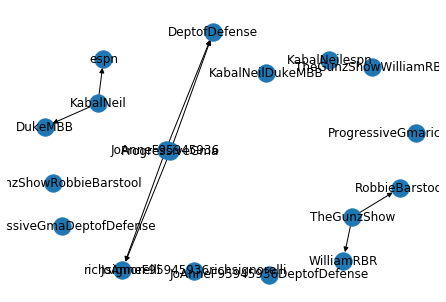

In [220]:
nx.draw(G, with_labels=True)
plt.show() 

In [222]:
nx.degree_centrality(G)

{'TheGunzShowWilliamRBR': 0.0,
 'TheGunzShowRobbieBarstool': 0.0,
 'KabalNeilespn': 0.0,
 'KabalNeilDukeMBB': 0.0,
 'ProgressiveGmarichsignorelli': 0.0,
 'ProgressiveGmaDeptofDefense': 0.0,
 'JoAnneF95945936richsignorelli': 0.0,
 'JoAnneF95945936DeptofDefense': 0.0,
 'TheGunzShow': 0.11764705882352941,
 'WilliamRBR': 0.058823529411764705,
 'RobbieBarstool': 0.058823529411764705,
 'KabalNeil': 0.11764705882352941,
 'espn': 0.058823529411764705,
 'DukeMBB': 0.058823529411764705,
 'ProgressiveGma': 0.11764705882352941,
 'richsignorelli': 0.11764705882352941,
 'DeptofDefense': 0.11764705882352941,
 'JoAnneF95945936': 0.11764705882352941}

In [ ]:
G.add_nodes_from(['A',"B","C","D",'E'])
G.add_edges_from([('A','C'), ('B','D'), ('B','E'), ('C', 'E'),('A','E')])

In [54]:
import networkx as nx 
import matplotlib.pyplot as plt

In [68]:
G = nx.DiGraph(directed=True)

In [51]:
print(G.nodes()) # returns a list
print(G.edges()) # returns a list

[]
[]


In [69]:
G.add_nodes_from(['A',"B","C","D",'E'])
G.add_edges_from([('A','C'), ('B','D'), ('B','E'), ('C', 'E'),('A','E')])

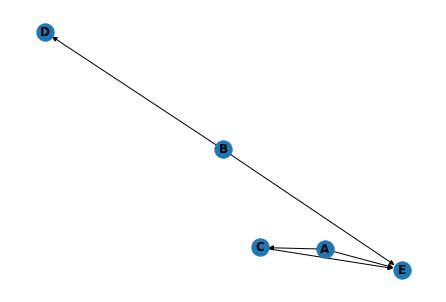

In [70]:
nx.draw(G, with_labels=True, font_weight='bold')
plt.show() 

In [81]:
nx.betweenness_centrality(G)

{'A': 0.0, 'B': 0.08333333333333333, 'C': 0.0, 'D': 0.0, 'E': 0.0}

In [71]:
E = [('A', 'B', 2), ('A', 'C', 1), ('B', 'D', 5), ('B', 'E', 3), ('C', 'E', 2)]
G.add_weighted_edges_from(E)

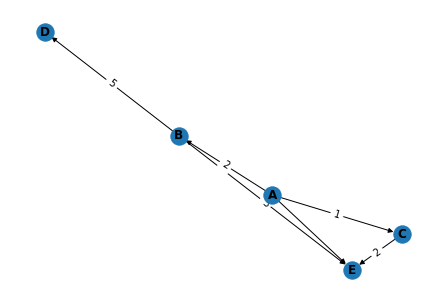

In [72]:
pos=nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold')
edge_weight = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
plt.show()